PRAC A1 - Write a Python program to plot a few activation functions that are being used in neural networks.

<function matplotlib.pyplot.show(close=None, block=None)>

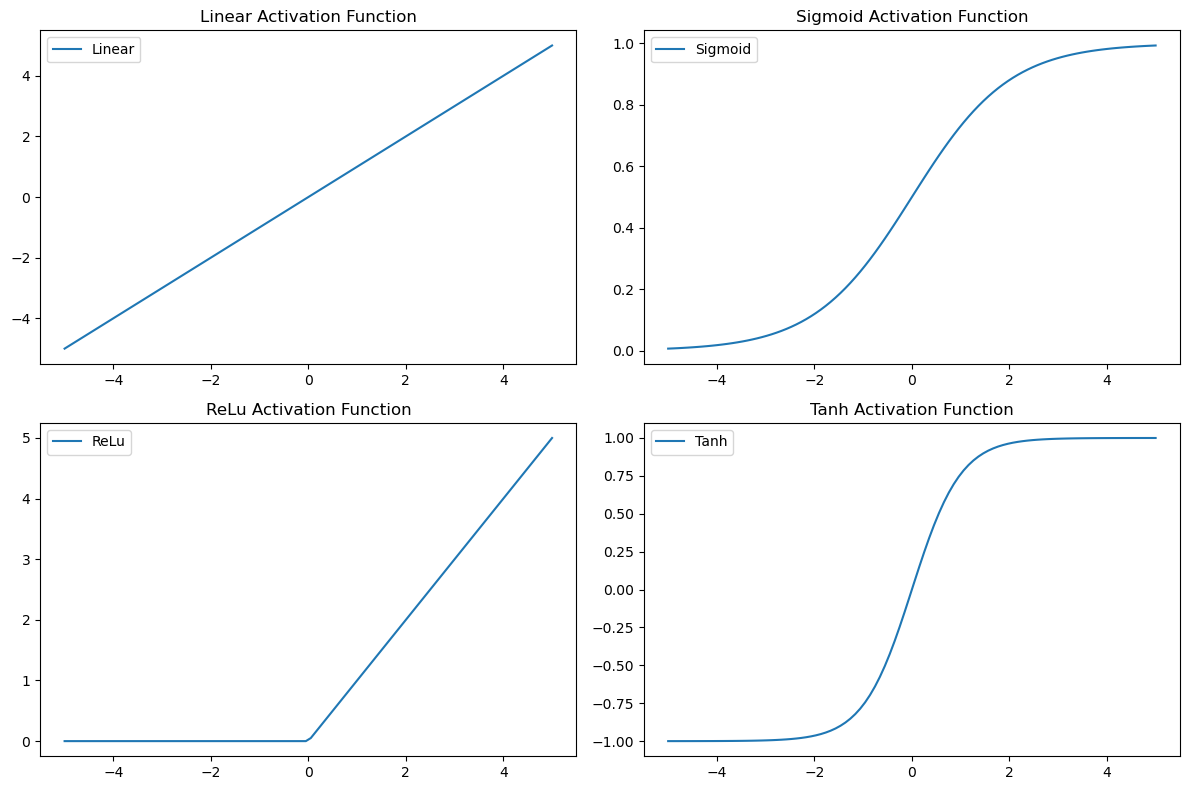

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def linear(x):
    return x

def ReLu(x):
    return np.maximum(0,x)

def tangent(x):
    return np.tanh(x)

x =np.linspace(-5,5,100)
y_Sigmoid = sigmoid(x)
y_linear = linear(x)
y_relu = ReLu(x)
y_tanh = tangent(x)

plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
plt.plot(x,y_Sigmoid,label="Sigmoid")
plt.title('Sigmoid Activation Function')
plt.legend()

plt.subplot(2,2,1)
plt.plot(x,y_linear,label="Linear")
plt.title("Linear Activation Function")
plt.legend()

plt.subplot(2,2,3)
plt.plot(x,y_relu,label="ReLu")
plt.title("ReLu Activation Function")
plt.legend()


plt.subplot(2,2,4)
plt.plot(x,y_tanh,label="Tanh")
plt.title('Tanh Activation Function')
plt.legend()

plt.tight_layout()
plt.show

 PRAC A2 - Generate ANDNOT function using McCulloch-Pitts neural net by a python program

In [5]:
class McCulloch:
    def __init__(self,weights,threshold):
        self.weights = weights
        self.threshold = threshold

    def activate(self,inputs):
        sum_input = sum(w*i for w,i in zip(self.weights,inputs))
        return 1 if sum_input>self.threshold else 0
    
def AndNot(x,y,weights) :
    threshold =0
    neuron = McCulloch(weights,threshold)
    return neuron.activate([x,y])
weight_x = int(input("Enter Weight for first input: "))
weight_y = int(input("Enter Weight for Second input: "))

weights=[weight_x,weight_y]
neuron = AndNot(1,0,weights)
print(f"the neuron(1,0) with weights {weights}:{neuron}")
print("1 Means Activated and 0 Means De-Activated")

Enter Weight for first input: -1
Enter Weight for Second input: 0
the neuron(1,0) with weights [-1, 0]:0
1 Means Activated and 0 Means De-Activated


PRACTICAL A3: Write a Python Program using Perceptron Neural Network to recognise even and odd numbers. Given numbers are in ASCII form 0 to 9

In [8]:
import numpy as np
class Perceptron:
    def __init__(self,input_size):
        self.weights= np.zeros(input_size)
        self.bias =0

    def predict(self,inputs):
        return np.dot(self.weights,inputs)+self.bias>0

    def train(self,training_input,labels,epochs=100,learning_rate=0.1):
        for epoch in range(epochs):
            for i,label in zip(training_input,labels):
                inputs = np.array(i)
                prediction = self.predict(inputs)
                self.weights += learning_rate * (label - prediction) * inputs
                self.bias += learning_rate * (label - prediction)
def ascii_binary(ascii_value):
    binary = bin(ascii_value)[2:]
    binary_arr = [int(bit) for bit in binary]
    while len(binary_arr)<8:
        binary_arr.insert(0,0)
    return binary_arr
training_inputs = [ascii_binary((ord(str(digit)))) for digit in range (10)]
labels = [0,1,0,1,0,1,0,1,0,1]
perceptron = Perceptron(input_size=len(training_inputs[0]))
perceptron.train(training_inputs,labels)
test_val = ascii_binary(ord('9'))
if(perceptron.predict(test_val)):
    result ="odd"
else:
    result ="even"

print(f"the predicted number is {result}")

the predicted number is odd


PRACTICAL A4: With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

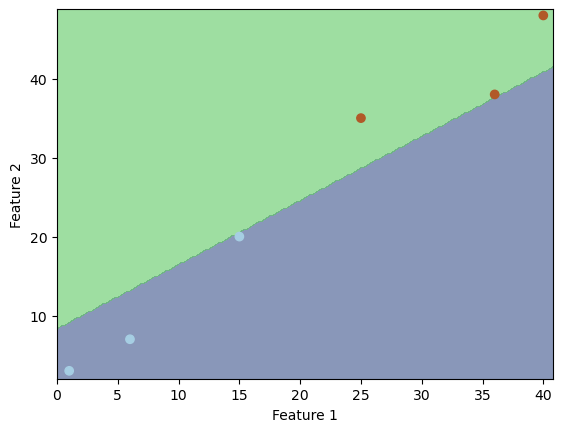

In [9]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self,input_size):
        self.weights = np.zeros(input_size)
        self.bias =0

    def predict(self,inputs):
        return np.dot(inputs,self.weights) + self.bias > 0

    def train(self,training_inputs,labels,epochs=100,learning_rate=0.1):
        for epooch in range (epochs):
            for input,label in zip(training_inputs,labels):
                inputs = np.array(input)
                predict = self.predict(inputs)
                self.weights += learning_rate * (label - predict) * inputs
                self.bias += learning_rate * (label - predict)

X = np.array([[1,3],[6,7],[15,20],[25,35],[36,38],[40,48]])
y = np.array([0,0,0,1,1,1])

perceptron = Perceptron(len(X[0]))
perceptron.train(X,y)

x_min , x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1 ,X[:,1].max() + 1

xx ,yy = np.meshgrid(np.arange(x_min,x_max, 0.2) , np.arange(y_min,y_max,0.2))

Z = perceptron.predict(np.c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha =0.6)
plt.scatter(X[:,0],X[:,1],c=y , cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

PRACTICAL A5: Write a python Program for Bidirectional Associative Memory with two pairs of vectors

In [28]:
import numpy as np
class BAM:
    def __init__(self,input_size,output_size):
        self.weights = np.zeros((input_size,output_size))

    def train(self,input_pattern,output_pattern):
        for i in range(input_pattern.shape[0]):
            x = input_pattern[i]
            y = output_pattern[i]
            self.weights += np.outer(x,y) 

    def recall_input(self,output_pattern):
        return np.dot(self.weights,output_pattern)

    def recall_output(self,input_pattern):
        return np.dot(self.weights,input_pattern)
    
input_size = 2
output_size = 2
bam = BAM(input_size,output_size)

input_pattern = np.array([[1,-1],[-1,1]])
output_pattern = np.array([[-1,1],[1,-1]])
bam.train(input_pattern , output_pattern)

test_input = np.array([1,-1])
output_recalled = bam.recall_output(input_pattern)
print("Input:",input_pattern)
print("Output Recalled:",output_recalled)

test_output = np.array([1,-1])
input_recall = bam.recall_input(output_pattern)
print("Input Recalled:",input_recall )
print("From Output :",output_pattern)

Input: [[ 1 -1]
 [-1  1]]
Output Recalled: [[-4.  4.]
 [ 4. -4.]]
Input Recalled: [[ 4. -4.]
 [-4.  4.]]
From Output : [[-1  1]
 [ 1 -1]]


PRACTICAL A7: Implement Artificial Neural Network training process in Python by using Forward Propagation, Back Propagation

In [22]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weight1 = np.random.randn(self.input_size , self.hidden_size)
        self.weight2  = np.random.randn(self.hidden_size , self.output_size)

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def derivative(self,x):
        return x * (1-x)

    def forward(self,x):
        self.z = np.dot(x,self.weight1)
        self.z2 = self.sigmoid(self.z)

        self.z3 = np.dot(self.z2,self.weight2)
        output = self.sigmoid(self.z3)
        return output
        
    def backward(self,x,y,output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.derivative(output)

        self.z2_error = self.output_delta.dot(self.weight2.T)
        self.z2_delta = self.z2_error * self.derivative(self.z2)

        self.weight1 += X.T.dot(self.z2_delta)
        self.weight2 += self.z2.T.dot(self.output_delta)

    def train(self,X, y ,epochs):
        for epoch in range(epochs) :
            output =self.forward(X)

            self.backward(X,y,output)
            
nn = NeuralNetwork(input_size=2,hidden_size =3 ,output_size =1)

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

nn.train(X,y,epochs=10000)

new_data = np.array([[0,0.3],[0,0.8],[1,0.2],[1,0.6]])
predictions = nn.forward(new_data)
print(predictions)

[[0.53942641]
 [0.97229629]
 [0.90512083]
 [0.51633522]]


 PRACTICAL B1 : Write a python program to show Back Propagation Network for XOR function with Binary Input and Output

In [23]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

weights1 = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias1 = np.random.uniform(size=(1, hidden_layer_size))
weights2 = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias2 = np.random.uniform(size=(1, output_layer_size))

learning_rate = 0.1
epochs = 100000

for epoch in range(epochs):
    hidden_layer_output = sigmoid(np.dot(x, weights1) + bias1)
    output_layer_output = sigmoid(np.dot(hidden_layer_output, weights2) + bias2)
    
    error = y - output_layer_output
    output_layer_delta = error * sigmoid_derivative(output_layer_output)
    
    hidden_layer_error = output_layer_delta.dot(weights2.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    weights2 += hidden_layer_output.T.dot(output_layer_delta) * learning_rate
    bias2 += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate
    
    weights1 += x.T.dot(hidden_layer_delta) * learning_rate
    bias1 += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

predictions = sigmoid(np.dot(sigmoid(np.dot(x, weights1) + bias1), weights2) + bias2)
print(predictions.round())

[[0.]
 [1.]
 [1.]
 [0.]]


pRACTICAL B2: Write a python program to illustrate ART neural network.

In [40]:
!pip install artlearn

  Obtaining dependency information for artlearn from https://files.pythonhosted.org/packages/60/27/71852a78c8225a56231181728c29d42168c08a29e5094fcd74cd869e05ec/artlearn-0.1.0-py3-none-any.whl.metadata


In [43]:
from artlearn import ART1
import numpy as np

# Define the parameters for the ART1 network
num_categories = 3
num_features = 8  # 8-bit binary representation for each alphabet
rho = 0.5  # vigilance parameter

# Create an instance of the ART1 network
art = ART1(num_categories, num_features, rho)

# Define binary patterns representing alphabets (A, B, C)
input_patterns = [
    [0, 1, 0, 0, 0, 0, 0, 1],  # A: 01000001
    [0, 1, 0, 0, 0, 0, 1, 0],  # B: 01000010
    [0, 1, 0, 0, 0, 0, 1, 1]   # C: 01000011
]

# Fit the network to the input patterns
art.fit(input_patterns)

# Define a function to classify a new pattern
def classify_alphabet(pattern):
    category = art.predict(np.array(pattern).reshape(1, -1))
    if category == 0:
        return "A"
    elif category == 1:
        return "B"
    elif category == 2:
        return "C"
    else:
        return "Unknown"

# User input for a new pattern
print("Enter the 8-bit binary pattern for the new alphabet:")
new_pattern = []
for i in range(num_features):
    while True:
        value = input(f"Enter bit {i + 1}: ")
        if len(value) == 1 and value in ['0', '1']:
            new_pattern.append(int(value))
            break
        else:
            print("Please enter a single binary digit (0 or 1).")

# Classify the user-input pattern
result = classify_alphabet(new_pattern)
print(f"The new pattern represents alphabet {result}.")

Enter the 8-bit binary pattern for the new alphabet:
Enter bit 1: 0
Enter bit 2: 1
Enter bit 3: 0
Enter bit 4: 0
Enter bit 5: 0
Enter bit 6: 0
Enter bit 7: 0
Enter bit 8: 1
The new pattern represents alphabet A.


PRACTICAL B4: Write a python program to design a Hopfield Network which stores 4 vectors

In [24]:
import numpy as np

vector =np.array([[1,1,-1,-1],
                  [1,-1,1,-1],
                  [-1 ,1,-1,1],
                  [-1,-1,1,1]])

weights = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        if i==j:
            weights[i][j] =0
        else:
            weights[i][j] = (np.dot(vector[i] , vector[j]))/4
            

def activation(x):
    if x>=0:
        return 1
    else :
        return -1

def hopfield_network(x,weights):
    y =np.copy(x)
    for i in range(4):
        sum=0
        for j in range(4):
            sum += weights[i][j] * y[j]
        y[i] = activation(sum)
    return y

for i in range(4):
    print("Input Vector:",vector[i])
    output = hopfield_network(vector[i],weights)
    print("Output Vector:",output)

Input Vector: [ 1  1 -1 -1]
Output Vector: [ 1  1 -1 -1]
Input Vector: [ 1 -1  1 -1]
Output Vector: [ 1 -1  1 -1]
Input Vector: [-1  1 -1  1]
Output Vector: [-1  1 -1  1]
Input Vector: [-1 -1  1  1]
Output Vector: [-1 -1  1  1]


Prac C1: How to Train a Neural Network with TensorFlow/Pytorch and evaluation of logistic regression using tensorflow

In [34]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/70


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3594 - loss: 1.3489
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3448 - loss: 1.3613 
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3625 - loss: 1.3283 
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3542 - loss: 1.2559 
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3219 - loss: 1.3027  
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.2243 
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3563 - loss: 1.1857 
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3469 - loss: 1.1729 
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3115 - loss: 1.1744  
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3240 - loss: 1.1388  
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3542 - loss: 1.1110  
Epoch 12/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3135 - loss: 1.1133  
Epoch 13

 Practical C4: MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets
     

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
     

train_images, test_images = train_images / 255.0, test_images / 255.0
     

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
     

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

model.fit(train_images, train_labels, epochs=5, batch_size=64)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
    

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8650 - loss: 0.4428
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9841 - loss: 0.0505
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9887 - loss: 0.0362
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9910 - loss: 0.0286
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9936 - loss: 0.0220
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9874 - loss: 0.0398
Test accuracy: 0.9908999800682068


In [38]:
import numpy as np

index = 1
test_image = test_images[index]

test_image = np.reshape(test_image, (1, 28, 28, 1 )) # batch(cuz trained on 32 batch SGD), x, y, rbg(can ignore)

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)

test_labels[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted label: 2


2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


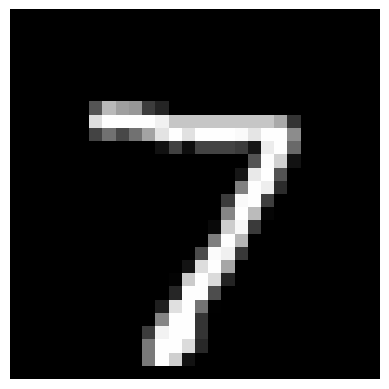

Predicted label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


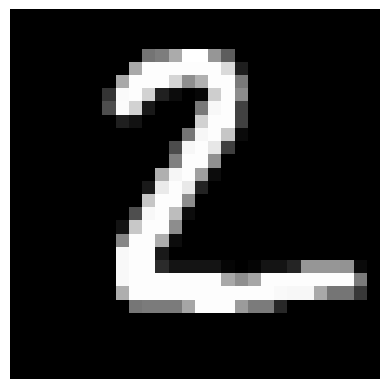

Predicted label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


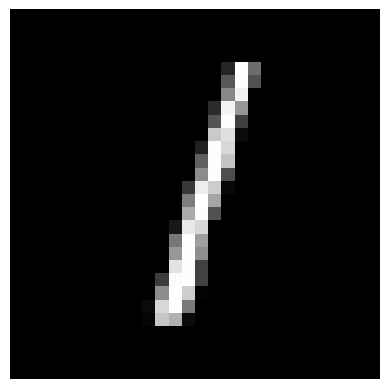

Predicted label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


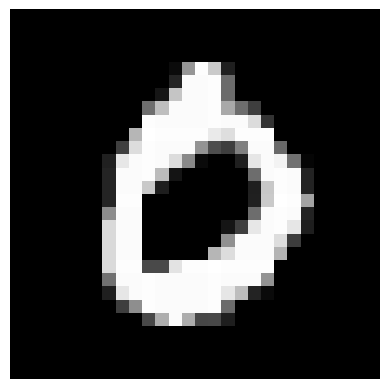

Predicted label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


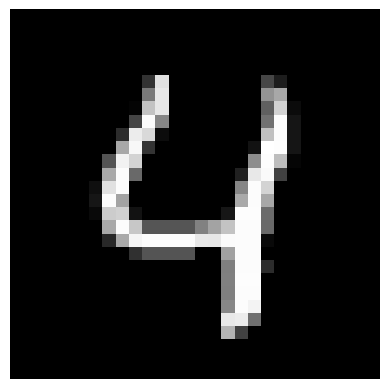

Predicted label: 4


In [39]:
import numpy as np
import time



indices = [0, 1, 2, 3, 4]

for index in indices:
    test_image = test_images[index]

    test_image_reshaped = np.reshape(test_image, (1, 28, 28, 1))

    prediction = model.predict(test_image_reshaped)

    predicted_label = np.argmax(prediction)

    plt.imshow(test_image, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Predicted label:", predicted_label)